In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify

%matplotlib inline
pd.set_option('display.max_columns', None)

import warnings
warnings.simplefilter("ignore")

In [2]:
raw = pd.read_csv('/Users/adriana/Library/CloudStorage/GoogleDrive-adrianajmachado@gmail.com/My Drive/_Projects/311-Data-git/I-1279/data/clean_01Oct21_01Oct22_api.csv')
df = raw.copy()

In [3]:
print(df.shape)
print(df.columns)
df.head()

(1042202, 19)
Index(['requestId', 'createdDate', 'closedDate', 'typeId', 'typeName',
       'address', 'latitude', 'longitude', 'agencyId', 'agencyName',
       'sourceId', 'srnumber', 'sourceName', 'councilId', 'councilName',
       'councilID', 'total_population', 'area', 'pop_density'],
      dtype='object')


,requestId,createdDate,closedDate,typeId,typeName,address,latitude,longitude,agencyId,agencyName,sourceId,srnumber,sourceName,councilId,councilName,councilID,total_population,area,pop_density
0,8610592,2021-10-01 00:01:14,2021-10-08 09:24:53,4,Bulky Items,"11614 N HERRICK AVE, 91340",34.281312,-118.425453,3,Sanitation Bureau,8,1-2079512481,Phone Call,64,Pacoima,64,24732.0,17.038756,1451.514436
1,8610569,2021-10-01 00:02:19,2021-10-08 13:36:33,5,Electronic Waste,"11614 N HERRICK AVE, 91340",34.281312,-118.425453,3,Sanitation Bureau,8,1-2079516251,Phone Call,64,Pacoima,64,24732.0,17.038756,1451.514436
2,8610575,2021-10-01 00:03:11,2021-10-13 12:31:58,4,Bulky Items,"4539 N VISTA DEL MONTE AVE, 91403",34.154158,-118.450025,3,Sanitation Bureau,8,1-2079512561,Phone Call,72,Sherman Oaks,72,NaN,NaN,NaN
3,8612855,2021-10-01 00:04:14,2021-10-05 14:25:02,6,Illegal Dumping,"918 W COLLEGE ST, 90012",34.066466,-118.245113,3,Sanitation Bureau,3,1-2079516331,Email,38,Historic Cultural North,38,30626.0,2.840725,10781.050656
4,8610587,2021-10-01 00:05:25,2021-10-08 14:16:32,7,Metal/Appliances,"11614 N HERRICK AVE, 91340",34.281312,-118.425453,3,Sanitation Bureau,8,1-2079516401,Phone Call,64,Pacoima,64,24732.0,17.038756,1451.514436


In [4]:
# extract necessary columns
df = df[['requestId', 'createdDate', 'closedDate', 'agencyId', 'agencyName', 'latitude', 'longitude', 'councilId', 'councilName',
       'councilID']]

# check nulls
print(df.isnull().sum())

# check duplicates
print(f'\nNumber of duplicates is {df.duplicated().sum()}')

requestId      0
createdDate    0
closedDate     0
agencyId       0
agencyName     0
latitude       0
longitude      0
councilId      0
councilName    0
councilID      0
dtype: int64

Number of duplicates is 0


# Exploratory Data Analysis

In [5]:
# What are the different agencies on record and the count of 311 requests? 
df_agency_ct = df[['agencyId', 'agencyName']].value_counts().reset_index(name = 'request_ct').sort_values('request_ct', ascending = False)
print(df_agency_ct)

   agencyId                          agencyName  request_ct
0         3                   Sanitation Bureau      756066
1         4  Office of Community Beautification      251081
2         1              Street Lighting Bureau       17128
3         5       Information Technology Agency       14832
4         6         Department of Water & Power        2995
5         7           Bureau of Street Services          98
6         9       Department of Animal Services           1
7        12   Department of Building and Safety           1


In [6]:
# Which agency has the longest turn around time from createdDate to closedDate?

# Convert createdDate and closedDate to datetime
df['createdDate'] = pd.to_datetime(df['createdDate'])
df['closedDate'] = pd.to_datetime(df['closedDate'])

# Create turnaround column
df['time_to_close'] = df['closedDate'] - df['createdDate']

# determine metric
print('time_to_close stats')
print(df['time_to_close'].describe())
print('='*75)

# Groupby and metric for turnaround time by agency
df_agency_tat = df.groupby(['agencyId', 'agencyName'])['time_to_close'].median().reset_index(name = 'median_turnaround').sort_values('median_turnaround', ascending = False)
print(df_agency_tat)

time_to_close stats
count                       1042202
mean      5 days 21:20:26.595102484
std      18 days 17:28:26.716087889
min            -3221 days +12:03:31
25%                 0 days 18:06:00
50%                 1 days 20:58:10
75%          4 days 17:56:52.750000
max               364 days 09:30:39
Name: time_to_close, dtype: object
   agencyId                          agencyName       median_turnaround
0         1              Street Lighting Bureau 43 days 14:03:19.500000
6         9       Department of Animal Services         7 days 16:36:24
5         7           Bureau of Street Services         3 days 00:20:57
1         3                   Sanitation Bureau  2 days 09:54:29.500000
3         5       Information Technology Agency  1 days 02:07:25.500000
7        12   Department of Building and Safety         0 days 02:40:07
2         4  Office of Community Beautification         0 days 00:06:14
4         6         Department of Water & Power         0 days 00:00:00


In [7]:
df_agency = pd.merge(df_agency_ct, df_agency_tat, how = 'inner', on = ['agencyId', 'agencyName'])
df_agency

,agencyId,agencyName,request_ct,median_turnaround
0,3,Sanitation Bureau,756066,2 days 09:54:29.500000
1,4,Office of Community Beautification,251081,0 days 00:06:14
2,1,Street Lighting Bureau,17128,43 days 14:03:19.500000
3,5,Information Technology Agency,14832,1 days 02:07:25.500000
4,6,Department of Water & Power,2995,0 days 00:00:00
5,7,Bureau of Street Services,98,3 days 00:20:57
6,9,Department of Animal Services,1,7 days 16:36:24
7,12,Department of Building and Safety,1,0 days 02:40:07


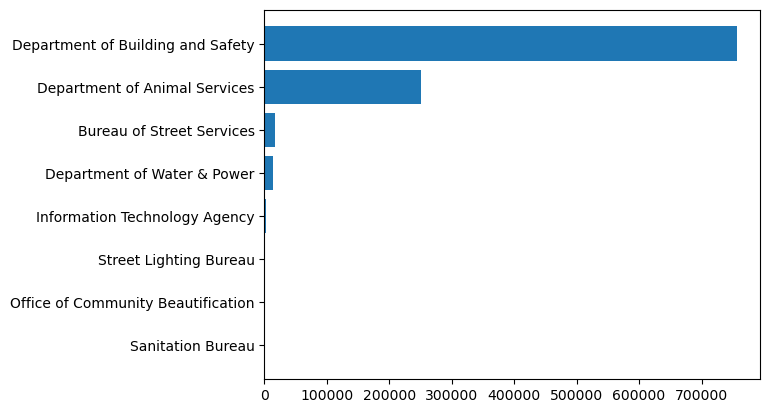

In [21]:
# Barh plot of agency and count of requests in dataset
plt.barh(df_agency['agencyName'], df_agency['request_ct'].sort_values(ascending = True), tick_label = df_agency['agencyName'])

# Show graph
plt.show()

In [9]:
# Created date to index
df.set_index('createdDate', inplace = True)

# Sort index for chronological order
df.sort_index(inplace = True)

# Daily Resample
df_agency_ts = df.groupby(['agencyId', 'agencyName']).resample('W').size().reset_index(name = 'week_request_ct')

In [10]:
# format df_agency_ts for plots
df_agency_ts['createdDate'] = pd.to_datetime(df_agency_ts['createdDate'])

# Created date to index
df_agency_ts.set_index('createdDate', inplace = True)

# Sort index for chronological order
df_agency_ts.sort_index(inplace = True)

In [11]:
df_agency_ts.head()

,agencyId,agencyName,week_request_ct
createdDate,,,
2021-10-03,1,Street Lighting Bureau,107
2021-10-03,6,Department of Water & Power,19
2021-10-03,4,Office of Community Beautification,1479
2021-10-03,3,Sanitation Bureau,5494
2021-10-03,5,Information Technology Agency,312


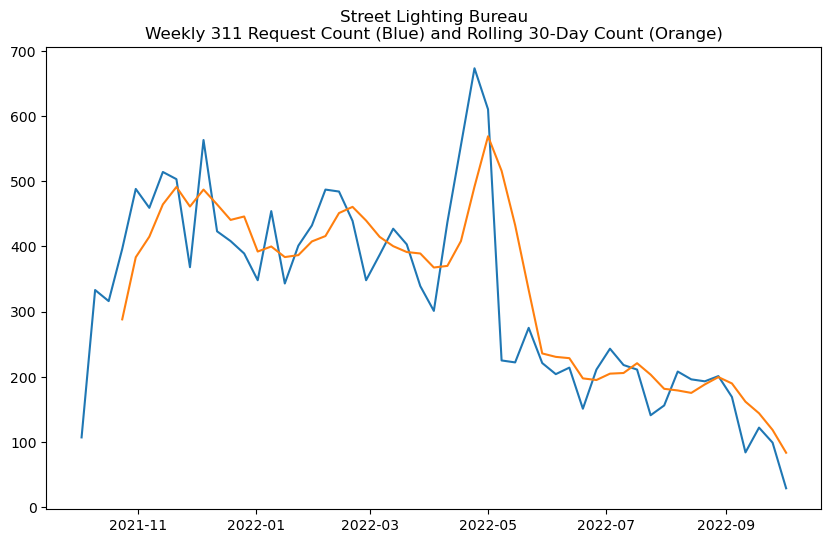

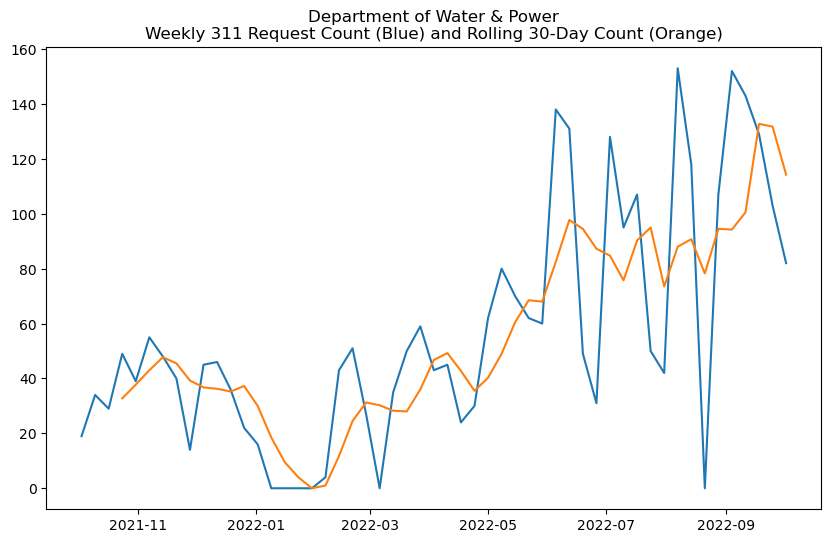

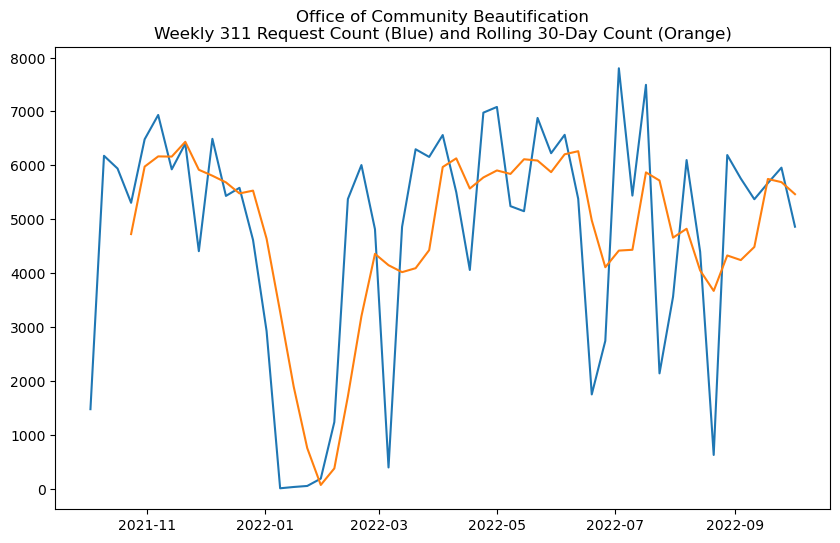

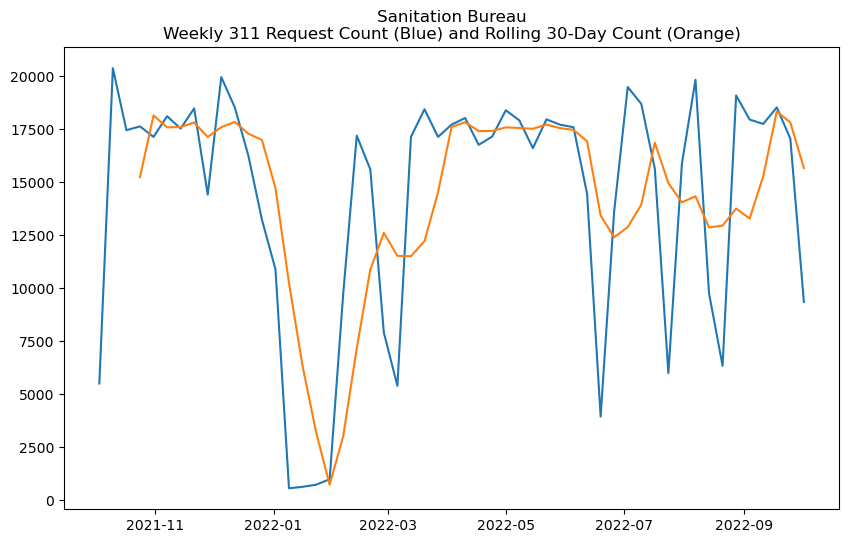

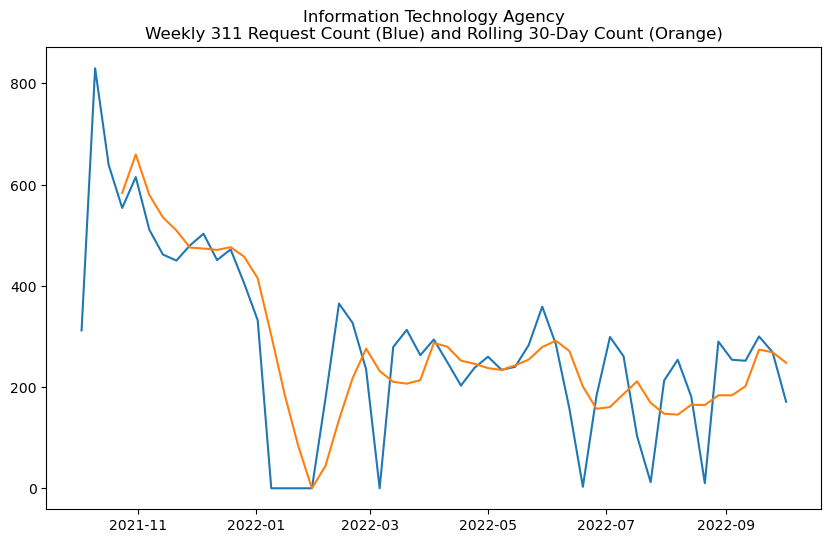

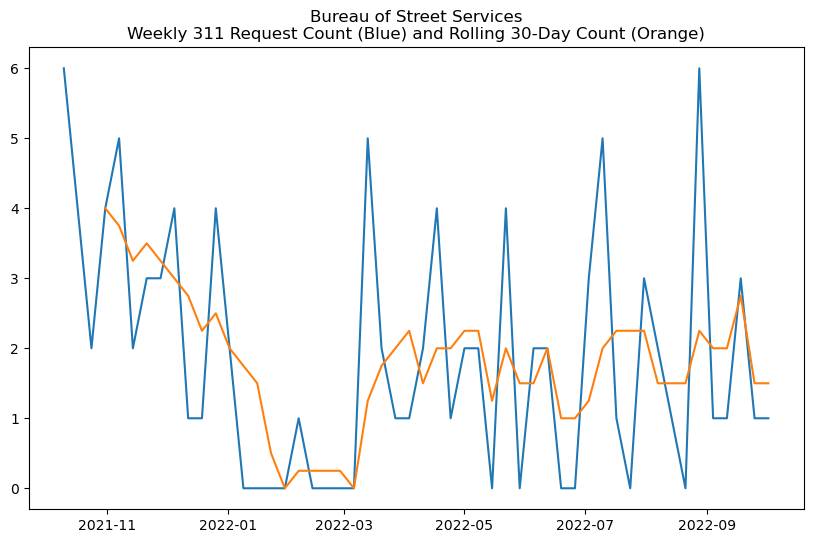

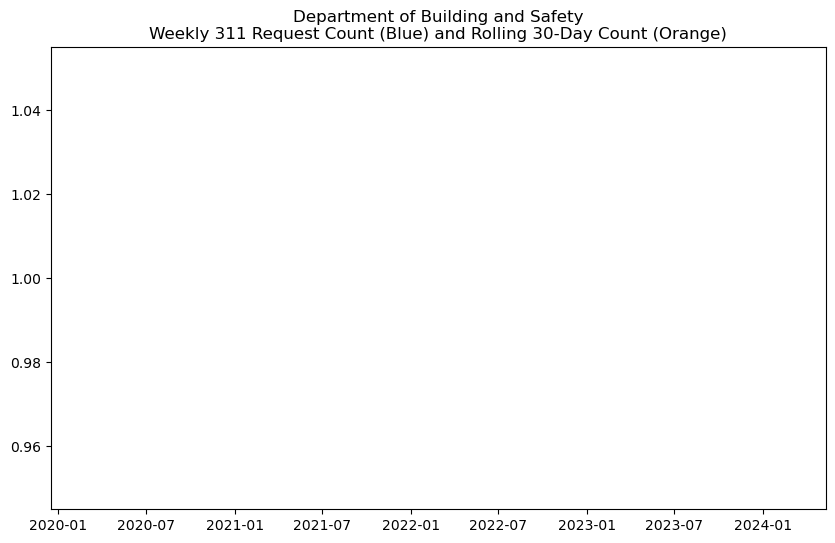

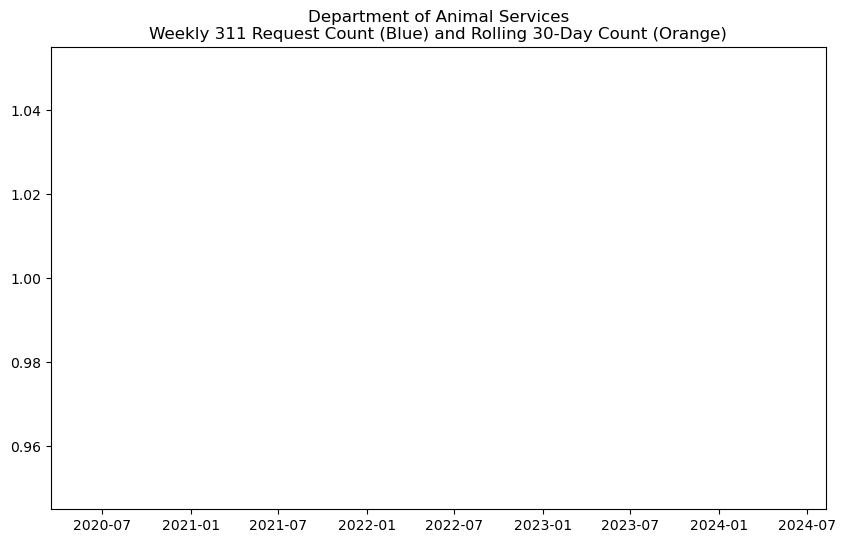

In [17]:
for agency in df_agency_ts['agencyName'].unique():
    temp_df = df_agency_ts[df_agency_ts['agencyName'] == agency]
    plt.figure(figsize = (10, 6))
    plt.title(agency + '\nWeekly 311 Request Count (Blue) and Rolling 30-Day Count (Orange)')
    plt.plot(temp_df['week_request_ct'])
    plt.plot(temp_df['week_request_ct'].rolling(4).mean());